# Исследование объявлений о продаже квартир

<font color = 'black'>
<a id = "7"></a><br>
Содержание:
    
1. [Шаг 1. Ознакомление с данными](#1)
2. [Шаг 2. Предобработка данных](#2)
    *          [Заполняем пропуски по геолокации ](#2.1)
    *          [Остальные пропуски по геолокации ](#2.2)
3. [Замена типа данных](#3)    
4. [Подсчёт и добавление в таблицу](#4)     
5. [EDA](#5)    
    *           [Исследование площади, цены, числа комнат и высоты потолков ](#5.1)
    *           [Время продажи](#5.2)
    *           [Чистка редких значений и выбросов ](#5.3)
    *           [Вычисление факторов, влияющих на стоимость ](#5.4)
    *           [Исследование топ-10 населённых пунктов ](#5.5)
    *           [Влияние цены на расстояние от центра города ](#5.6)
    *           [Выделение сегмента квартир в центре ](#5.7)
    
                           
6. [Общий вывод](#6)

<a id = "1"></a><br>
### Шаг 1. Ознакомление с данными

In [807]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#data = pd.read_csv('###', sep='\t')

#### Проверка столбцов на артефакты

In [809]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [810]:
data.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,1.3e+07,3.35e+06,5.196e+06,6.49e+07,1e+07
total_area,108,40.4,56,159,100
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,NaN,NaN,NaN,3.03
floors_total,16,11,5,14,14
living_area,51,18.6,34.3,NaN,32
floor,8,1,4,9,13
is_apartment,NaN,NaN,NaN,NaN,NaN


In [811]:
# Смотрим типы данных и возможные пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [812]:
# Смотрим на распределения числовых величин, выбросы 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [813]:
# Количество дубликатов в данных(до обработки пропусков, типов данных и т.д.)
data.duplicated().sum()

0

In [814]:
# Смотрим пропуски:
for col in data:
    if data[col].isna().sum() != 0:
        print('Количество nan/null объектов в столбце {}: {}'.format(col, data[col].isna().sum()))

Колличество nan/null объектов в столбце ceiling_height: 9195
Колличество nan/null объектов в столбце floors_total: 86
Колличество nan/null объектов в столбце living_area: 1903
Колличество nan/null объектов в столбце is_apartment: 20924
Колличество nan/null объектов в столбце kitchen_area: 2278
Колличество nan/null объектов в столбце balcony: 11519
Колличество nan/null объектов в столбце locality_name: 49
Колличество nan/null объектов в столбце airports_nearest: 5542
Колличество nan/null объектов в столбце cityCenters_nearest: 5519
Колличество nan/null объектов в столбце parks_around3000: 5518
Колличество nan/null объектов в столбце parks_nearest: 15620
Колличество nan/null объектов в столбце ponds_around3000: 5518
Колличество nan/null объектов в столбце ponds_nearest: 14589
Колличество nan/null объектов в столбце days_exposition: 3181


In [815]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [816]:
# Статистика по населённым пунктам
data[data['locality_name'] != 'Санкт-Петербург'].describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,7978.0,9.224492e+00,5.494695e+00,0.0,5.0,9.0,13.00,39.0
last_price,7978.0,3.544434e+06,2.204650e+06,430000.0,2350000.0,3200000.0,4200000.00,42000000.0
total_area,7978.0,5.167267e+01,2.106798e+01,15.0,37.0,47.0,61.00,380.0
rooms,7978.0,1.871647e+00,8.930924e-01,0.0,1.0,2.0,2.00,8.0
ceiling_height,4400.0,2.697532e+00,1.171376e+00,1.2,2.5,2.6,2.70,32.0
floors_total,7962.0,9.254459e+00,6.798594e+00,1.0,5.0,5.0,12.00,60.0
living_area,7215.0,2.940291e+01,1.396215e+01,2.0,18.0,28.0,37.40,239.4
floor,7978.0,5.203309e+00,4.781109e+00,1.0,2.0,4.0,6.00,27.0
kitchen_area,7079.0,9.382578e+00,4.084416e+00,2.3,6.6,8.9,10.90,64.0
balcony,4171.0,1.165668e+00,1.027736e+00,0.0,0.0,1.0,2.00,5.0


#### Статистика по Санкт-Петербургу

In [817]:
data[data['locality_name'] == 'Санкт-Петербург'].describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,15721.0,1.018020e+01,5.749004e+00,0.0,6.00,10.0,14.00,50.0
last_price,15721.0,8.062507e+06,1.301313e+07,12190.0,4200000.00,5500000.0,8160000.00,763000000.0
total_area,15721.0,6.475149e+01,4.041709e+01,12.0,42.00,55.0,74.60,900.0
rooms,15721.0,2.171618e+00,1.148098e+00,0.0,1.00,2.0,3.00,19.0
ceiling_height,10104.0,2.803709e+00,1.296912e+00,1.0,2.55,2.7,2.87,100.0
floors_total,15651.0,1.139589e+01,6.372330e+00,1.0,5.00,9.0,16.00,52.0
living_area,14581.0,3.695915e+01,2.470137e+01,2.0,19.90,31.3,44.00,409.7
floor,15721.0,6.242033e+00,4.900486e+00,1.0,3.00,5.0,8.00,33.0
kitchen_area,14342.0,1.115581e+01,6.543392e+00,1.3,7.20,9.9,12.50,112.0
balcony,8009.0,1.141965e+00,1.093276e+00,0.0,0.00,1.0,2.00,5.0


#### Пропуски не в Питере

In [818]:
geo_list = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']
for geo in geo_list:
    print(geo, len(data[(data['locality_name'] != 'Санкт-Петербург') & (data[geo].isna())]))
print('Колличество данных: ', len(data[data['locality_name'] != 'Санкт-Петербург']))

airports_nearest 5457
cityCenters_nearest 5458
parks_around3000 5457
ponds_around3000 5457
parks_nearest 7183
ponds_nearest 6851
Колличество данных:  7978


#### Пропуски в Питере

In [819]:
for geo in geo_list:
    print(geo, len(data[(data['locality_name'] == 'Санкт-Петербург') & (data[geo].isna())]))
print('Колличество данных: ', len(data[data['locality_name'] == 'Санкт-Петербург']))

airports_nearest 85
cityCenters_nearest 61
parks_around3000 61
ponds_around3000 61
parks_nearest 8437
ponds_nearest 7738
Колличество данных:  15721


### Вывод

#### Проанализировав данные, я обнаружил:
 * Дубликаты до предобработки данных отсутствуют(необходимо будет проверить после преобразования)
 * first_day_exposition нужно поменять на тип datetime
 * В столбцах есть выбросы(в describe строка с max значениями), нужно будет проверить их
 * Для 
     * balcony, days_exposition, floors_total, last_price, parks_around3000, parks_nearest, ponds_around3000, total_area нужна смена типа с float на int, а is_apartment с object на bool
 * Очень много населённых пунктов, придется лемматизировать и разделить на группы
 * Пропущенные значения в объявлениях(от общего числа в своём столбце): 
      ceiling_height - 39% , floors_total - 8%, is_apartment - 88%, kitchen_area - 10%, balcony - 49%, days_exposition - 13%,
      living_area - 8%
      
 * Пропущенные значения в гео данных(от общего числа в своём столбце):
      airports_nearest - 23%, cityCenters_nearest - 23%, parks_around3000 - 23%, , ponds_around3000 - 23%, parks_nearest - 66%, ponds_nearest - 62%. Скорее всего эти данные не выгрузили
 * 49 пропусков в locality_name

*Колличество недвижимости в Санкт-Петербурге - 66%, остальные населённые пункты - 33%*
* Практически отсутствуют гео данные по населённым пунктам, а у Санкт-Петербурга отсутствует половина данных о парках и прудах. Скорее всего данные были выгружены не в корректном формате или неверно, поэтому и пропуски
* метры и квадратные метры в столбцах, по средним и медианам совпадают с действительностью

<a id = "2"></a><br>
### Шаг 2. Предобработка данных
[Назад](#7)

#### Пропуски:

#### Заполним пропуски в столбцах

In [820]:
data['balcony'] = data['balcony'].fillna(0)

In [821]:
data['floors_total'] = data['floors_total'].fillna(0)

In [822]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [823]:
data['days_exposition'] = data['days_exposition'].fillna(0)

#### Замена пропусков в логических значениях

In [824]:
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Заполним пропуски высоты потолков медианами для Санкт-Петербурга и остальных населённых пунктов

In [825]:
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['ceiling_height'].isna()), 
         'ceiling_height'] = data['ceiling_height'].fillna(2.70)
data.loc[(data['locality_name'] != 'Санкт-Петербург') & (data['ceiling_height'].isna()), 
         'ceiling_height'] = data['ceiling_height'].fillna(2.60)

#### Заполняем пропуски по населённым пунктам

In [826]:
data['locality_name'] = data['locality_name'].fillna('')

#### Заполняем пропуски по жилой площади

In [827]:
data['living_area'] = data['living_area'].fillna(0)

<a id = "2.1"></a><br>
### Заполняем пропуски по геолокации:
[Назад](#7)

#### Делаем лист населённых пунктов, исключая Санкт-Петербург

In [828]:
other_locname = data['locality_name'].unique()
other_locname = other_locname[1:]

In [829]:
# Функция перебора списка столбцов, в которых локация и непустые значения принимаются за медиану, которая заменяет пропуск
def geo_change(geo_value, loc_value):
    not_na = data.loc[(data['locality_name'] == loc_value) & (data[geo_value].notna()), geo_value].median()
    if math.isnan(not_na):
        data.loc[(data['locality_name'] == other) & (data[geo_value].isna()), geo_value] = data[geo_value].fillna(0)
    else:
        data.loc[(data['locality_name'] == other) & (data[geo_value].isna()), geo_value] = data[geo_value].fillna(not_na)

In [830]:
# Цикл по каждому гео-столбцу и населённому пункту, с заполнением пропусков
for geo in geo_list:
    for other in other_locname:
        geo_change(geo, other)

In [831]:
# Цикл на отсутствие пропусков по населённым пунктам:
for geo in geo_list:
    print(geo, len(data[(data['locality_name'] != 'Санкт-Петербург') & (data[geo].isna())]))
print('Колличество данных: ', len(data[data['locality_name'] != 'Санкт-Петербург']))

airports_nearest 0
cityCenters_nearest 0
parks_around3000 0
ponds_around3000 0
parks_nearest 0
ponds_nearest 0
Колличество данных:  7978


<a id = "2.2"></a><br>
### Остальные пропуски по геолокации:
[Назад](#7)

#### Заполняем пропуски по Санкт-Петербургу:

In [832]:
for geo in geo_list:
    data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data[geo].isna()), geo] = data[geo].fillna(0)

#### Проверка на отсутствие пропусков по Санкт-Петербургу:

In [833]:
for geo in geo_list:
    print(geo, len(data[(data['locality_name'] == 'Санкт-Петербург') & (data[geo].isna())]))
print('Колличество данных: ', len(data[data['locality_name'] == 'Санкт-Петербург']))

airports_nearest 0
cityCenters_nearest 0
parks_around3000 0
ponds_around3000 0
parks_nearest 0
ponds_nearest 0
Колличество данных:  15721


#### Приведём все значения к единому регистру

In [834]:
data['locality_name'] = data['locality_name'].str.lower()

#### Проверяем количество уникальных значений до:

In [835]:
len(data['locality_name'].unique())

365

In [836]:
data['locality_name'] = data['locality_name'].replace(to_replace ='[nп]оселок', value = 'посёлок', regex = True)

#### Количество уникальных значений после:

In [837]:
len(data['locality_name'].unique())

331

### Вывод по замене пропусков
* По геоданным получилось очень много пропусков, в особенности по населённым пунктам, вне Санкт-Петербурга, поэтому пришлось написать функцию, которая будет по каждому населённому пункту искать медиану его гео-локации, иначе заполнять нулём
    * По Санкт-Петербургу так точечно не получится, поэтому значения были заполнены нулями.
* Отсутствие данных по начилию балкона можно заполнить нулевыми значениями
* Высота потолков была присвоена по двум большим группам:  Санкт-Петербург и остальные пункты. Медианное значение выросло на 5
* Столбец is_apartment очень трудно вычеслить, даже зная, что аппартаменты юридически идут от двух жилых комнат(но в данных встречались и с одной), поэтому признать всё квартирой, где количество комнат < 2 слишком зыбкая гипотеза

<b>Дополнительно устранил дубликаты в locality_name, связанные с поселок и посёлок</b>

<a id = "3"></a><br>
## Замена типа данных:
[Назад](#7)

#### Изменим тип float на int, а таже оптимизируем память, заменив int64 на более облегчённые версии(учитывая отсутствие отрицательных значений):
*uint8 от 0 по 255*

*uint16 от 0 по 65535*

*uint32 от 0 по 4294967295*

In [838]:
for name in ['total_images', 'floors_total', 'floor', 'rooms', 'ceiling_height', 'kitchen_area', 'balcony']:
    data[name] = data[name].astype('uint8')
    
for name in ['total_area', 'living_area', 'days_exposition']:
    data[name] = data[name].astype('uint16')

data['last_price'] = data['last_price'].astype('uint32')

#### Изменяем тип данных с float на uint32 по гео данным:

In [839]:
for geo in geo_list:
    data[geo] = data[geo].astype('uint32')

#### Смена типа данных у столбца с датой(было 2019-03-07T00:00:00):

In [840]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#### Проверяем соответствие и потребляемую память:

In [841]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,6.012051e+01,3.566582e+01,12.0,40.0,52.0,69.0,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.0,2.0,3.0,19.0
ceiling_height,23699.0,2.142411e+00,1.033337e+00,1.0,2.0,2.0,2.0,100.0
floors_total,23699.0,1.063509e+01,6.616396e+00,0.0,5.0,9.0,16.0,60.0
living_area,23699.0,3.146453e+01,2.308383e+01,0.0,17.0,29.0,41.0,409.0
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.0,4.0,8.0,33.0
kitchen_area,23699.0,9.329254e+00,6.395646e+00,0.0,6.0,9.0,11.0,112.0
balcony,23699.0,5.910798e-01,9.592982e-01,0.0,0.0,0.0,1.0,5.0


### Вывод по замене типа данных
* last_price, total_area, floors_total, living_area, kitchen_area, balcony, days_exposition, parks_around3000, ponds_around3000 - были заменены на int, потому что для любой количественной категории вещественный тип данных невозможен(всё равно что посчитать 1.5 ребёнка в семье или 1.5 этаж, 1.5 парка)
* В мерах длины(площадь, высота, а также airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest) точность до сантиметра не так важна в нашем кейсе
* Дата была изменена на date_time

<a id = "4"></a><br>
### Шаг 4. Подсчёт и добавление в таблицу
[Назад](#7)

#### Добавим цену за квадратный метр:

In [842]:
data['meter_price'] = data['last_price'] // data['total_area']

#### Изменим тип данных на облегчённый

In [843]:
data['meter_price'] = data['meter_price'].astype('uint32')

#### Добавим столбец с днём недели, месяцем и годом публикации ('%Y-%m-%d')

In [844]:
data['week_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.dayofweek
data['month_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.month
data['year_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.year

#### Скорректируем потребление памяти

In [845]:
data['week_exposition'] = data['week_exposition'].astype('uint8')
data['month_exposition'] = data['month_exposition'].astype('uint8')
data['year_exposition'] = data['year_exposition'].astype('uint16')

### Создадим функцию распределения этажа по типам

In [846]:
def floor_func(first_col, second_col):
    if first_col == 1:
        return 'первый'
    elif first_col == second_col:
        return 'последний'
    else:
        return 'другой'

#### Добавим тип этажа по трём вариантам: первый, последний и другой


In [847]:
data['floor_type'] = data.apply(lambda x : floor_func(x.floor, x.floors_total), axis=1)

#### Проверим полученные типы

In [848]:
data['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

#### Отношение жилой площади к общей:

In [849]:
data['living_to_total'] = round(data['living_area'] / data['total_area'], 2)

In [850]:
data['living_to_total'] = data['living_to_total'].astype('float16')

#### Отношение площади кухни к общей:

In [851]:
data['kitchen_to_total'] = round(data['kitchen_area'] / data['total_area'], 2)

In [852]:
data['kitchen_to_total'] = data['kitchen_to_total'].astype('float16')

In [853]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null uint8
last_price              23699 non-null uint32
total_area              23699 non-null uint16
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null uint8
ceiling_height          23699 non-null uint8
floors_total            23699 non-null uint8
living_area             23699 non-null uint16
floor                   23699 non-null uint8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null uint8
balcony                 23699 non-null uint8
locality_name           23699 non-null object
airports_nearest        23699 non-null uint32
cityCenters_nearest     23699 non-null uint32
parks_around3000        23699 non-null uint32
parks_nearest           23699 non-null uint32
ponds_around3000      

<a id = "5"></a><br>
### Шаг 5. EDA
[Назад](#7)

<a id = "5.1"></a><br>
### 5.1 Исследуем площадь, цену, число комнат и высоту потолков

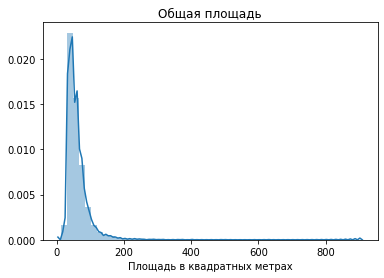

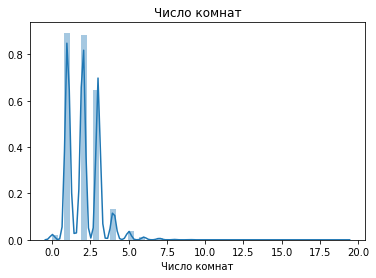

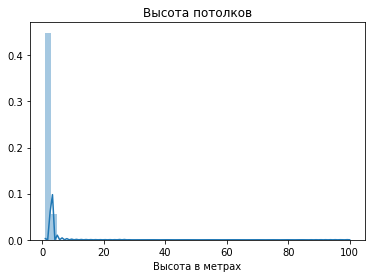

In [854]:
ax = sns.distplot(data['total_area'])
plt.title('Общая площадь')
plt.xlabel('Площадь в квадратных метрах')
plt.show()
ax = sns.distplot(data['rooms'])
plt.title('Число комнат')
plt.xlabel('Число комнат')
plt.show()
ax = sns.distplot(data['ceiling_height'])
plt.title('Высота потолков')
plt.xlabel('Высота в метрах')
plt.show()

In [855]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.142411
std          1.033337
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        100.000000
Name: ceiling_height, dtype: float64

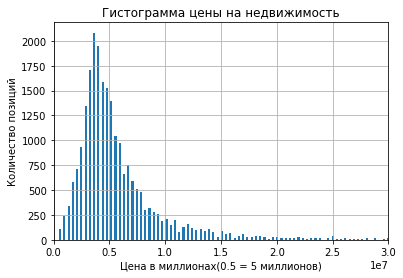

In [871]:
data['last_price'].hist(bins=2000, rwidth = 0.5)
plt.xlim(0, 30000000)
plt.xlabel('Цена в миллионах(0.5 = 5 миллионов)')
plt.ylabel('Количество позиций')
plt.title('Гистограмма цены на недвижимость')
plt.show()

In [872]:
data['last_price'].head()

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: uint32

In [873]:
data['last_price'].describe().apply('{:.0f}'.format)

count        23699
mean       6541549
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: object

### 5.1 Выводы
1. Площадь распределена между 40 и 69, с длинным хвостом, доходящим до 325 и дальнейшими выбросами
2. Комнаты распределены между 1 и 3, небольшими выбросами выше 3
3. Высота потолков распределена между 2.5 и 2.7, с хвостом до 3 метров(так как в Санкт-Петербурге есть старые постройки, с потолком выше 2.7) Пропуски по высоте потолков заполнил медианой по Санкт-Петербургу и остальным пунктам.
 * После трёх метров имеется очень большая полоса данных
4. Цена за квартиры распределена между 3 и 6.8 миллионами, с длинным хвостом до 30 миллионов и выбросом в 763 миллиона

<a id = "5.2"></a><br>
### 5.2 Время продажи
[Назад](#7)

#### Посмотрим распределение дней от публикации до продажи:

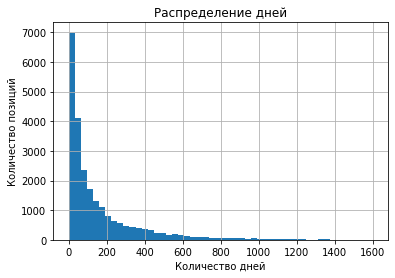

In [874]:
data['days_exposition'].hist(bins=50, range=(0, 1600))
plt.xlabel('Количество дней')
plt.ylabel('Количество позиций')
plt.title('Распределение дней')
plt.show()

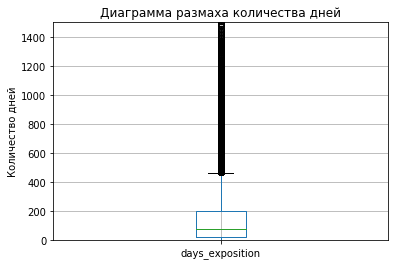

In [875]:
data.boxplot(column='days_exposition')
plt.ylim(0, 1500)
plt.ylabel('Количество дней')
plt.title('Диаграмма размаха количества дней')
plt.show()

In [876]:
# Посмотрим на медиану и среднюю в целом:
data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

### 5.2 Вывод
* Учитываем, что 13% данных days_exposition у нас заполнены нулями, соответственно на графике мы имеем определённое количество нулевых значений. От 22 до 200 дней - можно обозначить интервалом быстрых продаж, в дальнейшем количество дней увеличивается и доходит до подозрительных размеров - необычно долгие

<a id = "5.3"></a><br>
### 5.3 Чистим редкие значения и выбросы
[Назад](#7)

### Посчитаем, сколько данных мы теряем за пороговым значением

In [877]:
sample = data.query('rooms > 6')
print('Потери данных: {:.1%}'.format(len(sample) / len(data)), len(sample))

Потери данных: 0.4% 90


In [878]:
sample = data.query('last_price > 25000000')
print('Потери данных: {:.1%}'.format(len(sample) / len(data)), len(sample))


Потери данных: 2.0% 464


In [879]:
sample = data.query('days_exposition > 1000')
print('Потери данных: {:.1%}'.format(len(sample) / len(data)), len(sample))

Потери данных: 1.2% 276


### Отсечём лишние данные, ограничив порогом сверху

In [880]:
new_data = data.query('rooms <= 6 and last_price <= 25000000 and days_exposition < 1000 and total_area < 200')

#### Посмотрим распределение дней после удаление редких значений сверху

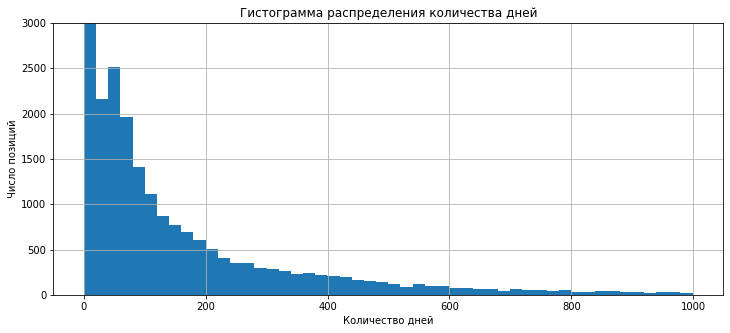

In [893]:
new_data['days_exposition'].hist(bins=50, figsize=(12, 5))
plt.ylim(0, 3000)
plt.ylabel('Число позиций')
plt.title('Гистограмма распределения количества дней')
plt.xlabel('Количество дней')
plt.show()

In [894]:
new_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,week_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total
count,22884.000000,2.288400e+04,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,...,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000
mean,9.822802,5.532529e+06,56.598147,2.007604,2.130003,10.703024,29.747684,5.907796,8.979374,0.594608,...,188.466833,0.570704,225.069743,143.612437,96135.899930,2.571797,6.397177,2017.402159,0.518066,0.166748
std,5.643576,3.542209e+06,24.271913,0.966119,1.043565,6.649889,17.902977,4.902366,5.502342,0.958889,...,311.288781,0.865630,310.508560,182.053570,34459.431391,1.791167,3.485175,1.005077,0.182739,0.087708
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.000000,5.000000,17.000000,2.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,22.000000,76434.000000,1.000000,3.000000,2017.000000,0.459961,0.119995
50%,9.000000,4.550000e+06,51.000000,2.000000,2.000000,9.000000,29.000000,4.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,71.000000,94850.000000,3.000000,6.000000,2017.000000,0.549805,0.160034
75%,14.000000,6.500000e+06,67.000000,3.000000,2.000000,16.000000,40.000000,8.000000,11.000000,1.000000,...,381.000000,1.000000,456.000000,189.000000,113333.000000,4.000000,10.000000,2018.000000,0.629883,0.219971
max,50.000000,2.500000e+07,199.000000,6.000000,100.000000,60.000000,164.000000,33.000000,65.000000,5.000000,...,3190.000000,3.000000,1344.000000,999.000000,642444.000000,6.000000,12.000000,2019.000000,1.000000,0.790039


### 5.3 Вывод
* Убрав выбросы сверху мы потеряли 4.5% данных, также у нас очень много нулевых данных
* Медиана и стандартное отклонение в некоторых данных остались прежними, но некоторые отклонились в большую и меньшую сторону

<a id = "5.4"></a><br>
### 5.4 Вычисляем факторы, влияющие на стоимость
[Назад](#7)

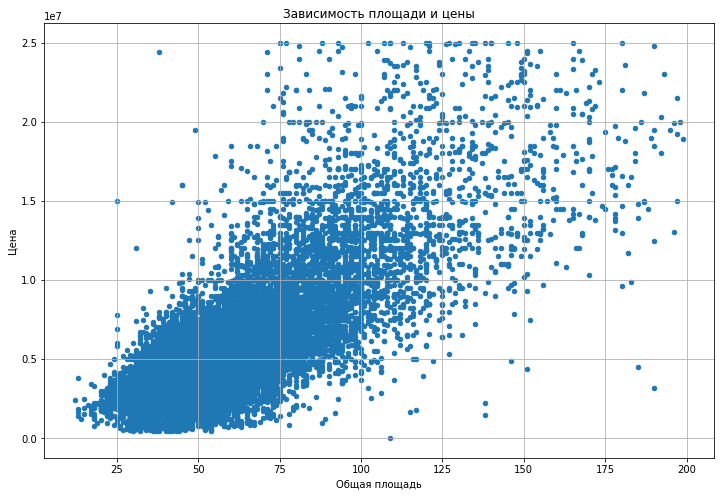

In [895]:
new_data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(12, 8), title='Зависимость площади и цены')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

*Разброс в данных сильный, но всё же видно, что по мере роста общей площади растёт и цена. Очень много высоких значений цены между 75 и 125 квадратными метрами. Предположительно цену либо сильно задрали, либо эти квартиры расположены близко к центру*

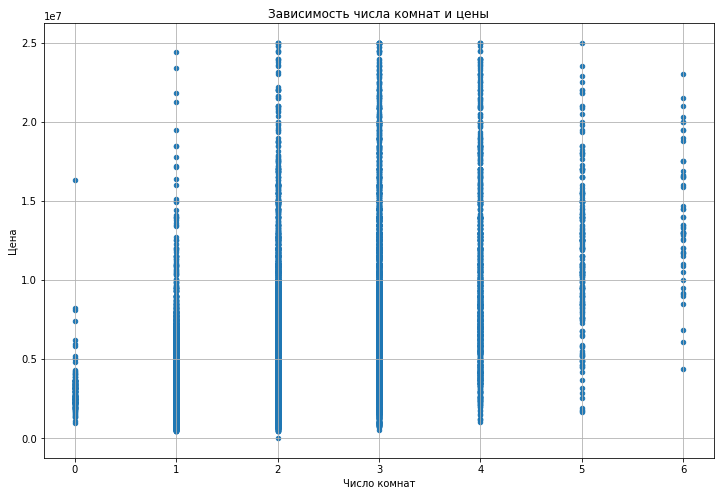

In [896]:
new_data.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(12, 8), title='Зависимость числа комнат и цены')
plt.xlabel('Число комнат')
plt.ylabel('Цена')
plt.show()

*больше всего данных с 1 по 3-4 комнату, поэтому мы наблюдаем достаточно плотное распределение значений. Больше всего цен на трёхкомнатную квартиру*

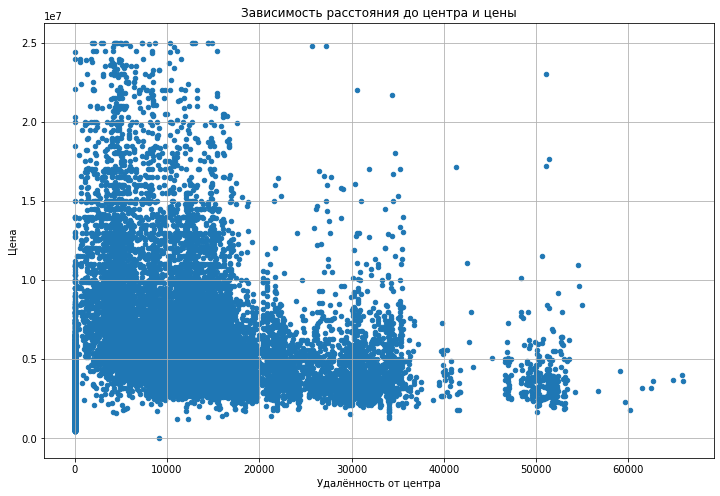

In [897]:
new_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, figsize=(12, 8), title='Зависимость расстояния до центра и цены')
plt.xlabel('Удалённость от центра')
plt.ylabel('Цена')
plt.show()

*Тут мы более чётко видим тенденцию снижения цены, в зависимости от расстояния до центра. С 1 до 15км мы наблюдаем много аномальных значений*

#### Сводная таблица по группе этажей и медианы стоимости

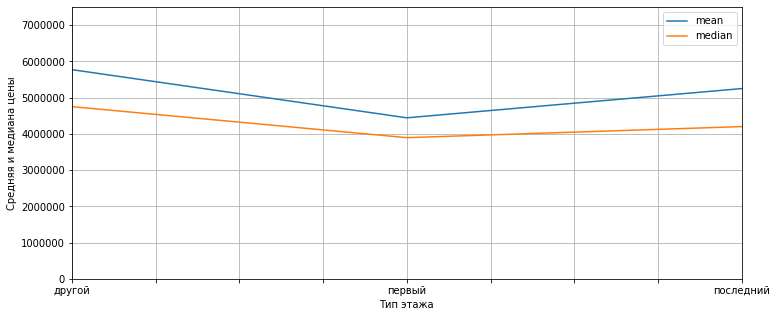

In [900]:
new_data.pivot_table(index='floor_type', values='last_price', aggfunc=('median', 'mean')).plot(grid=True, figsize=(12, 5))
plt.ylim(0, 7500000)
plt.xlabel('Тип этажа')
plt.ylabel('Средняя и медиана цены')
plt.show()

#### Посмотрим, как распределены промежуточные этажи и цены на этих промежутках

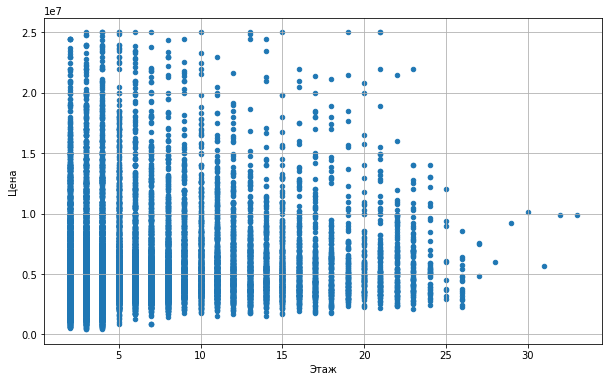

In [901]:
new_data.query('floor != 1 and floor != floors_total').plot(x='floor', y='last_price', kind='scatter', grid=True, figsize=(10,6))
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

In [902]:
new_data['floors_total'].value_counts().head()

5     5624
9     3695
16    1353
12    1333
4     1139
Name: floors_total, dtype: int64

#### Сводная таблица по дням недели и цене

In [ ]:
new_data.pivot_table(index=['week_exposition'], values='last_price', aggfunc=('median', 'mean')).plot(grid=True, figsize=(12, 5))
plt.ylim(0, 6000000)
plt.show()

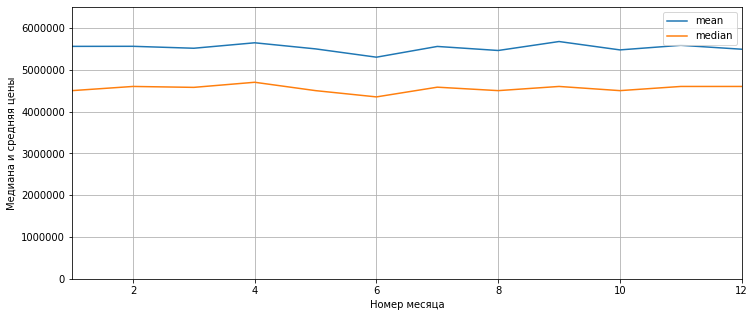

In [903]:
# Сводная таблица по месяцу и цена
new_data.pivot_table(index=['month_exposition'], values='last_price', aggfunc=('median', 'mean')).plot(grid=True, figsize=(12, 5))
plt.ylim(0, 6500000)
plt.xlabel('Номер месяца')
plt.ylabel('Медиана и средняя цены')
plt.show()

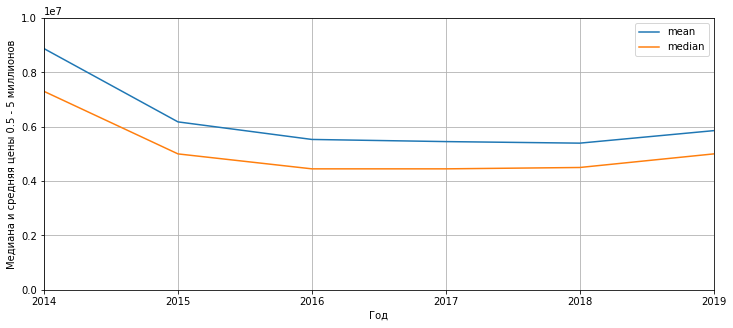

In [906]:
# Сводная таблица по году и цене
new_data.pivot_table(index=['year_exposition'], values='last_price', aggfunc=('median', 'mean')).plot(grid=True, figsize=(12, 5))
plt.ylim(0, 10000000)
plt.xlabel('Год')
plt.ylabel('Медиана и средняя цены 0.5 - 5 миллионов')
plt.show()

#### Посмотрим на корреляцию между разными столбцами:

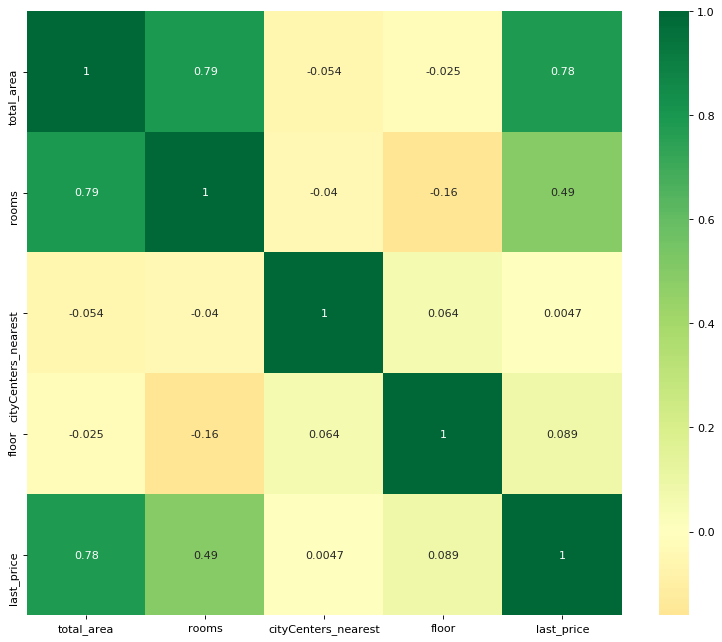

In [909]:
corr_list = new_data[['total_area', 'rooms', 'cityCenters_nearest', 'floor', 'last_price']]

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corr_list.corr(), xticklabels=corr_list.corr().columns, yticklabels=corr_list.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

### 5.4 Вывод
*Около 23% потреянных данных по столбцу cityCenter_nearest находится вне Санкт-Петербурга*

*Больше всего данных сосредоточено между первым и последним этажом. Медиана цены 4.7 миллионов. Цена за первый этаж чуть ниже.
Если смотреть на график промежуточных этажей, то мы просто напросто видим снижение высоких цен из-за того, что в Санкт-Петербурге и области чаще всего встречаются 5-ти и 9-ти этажки, а 12 и 16 чуть реже.* 

*Дни недели распределены и количество распределено нормально, медиана цены практически одинаковая.* 

*По цене год распределён нормально, но начало и конец года больше всего по количеству.* 

*По годам цены распределены более менее, но по количеству публикаций у нас больше всего выпадает на 2017-2018 год*

В итоге хорошая корреляция у total_area и средняя у rooms

<a id = "5.5"></a><br>
### 5.5 Исследование топ-10 населённых пунктов
[Назад](#7)

In [927]:
data.pivot_table(index='locality_name', values='last_price', aggfunc=('count', 'mean')).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,15721.0,8.062507e+06
посёлок мурино,556.0,3.652361e+06
посёлок шушары,440.0,4.108082e+06
всеволожск,398.0,3.789068e+06
пушкин,369.0,6.469036e+06
колпино,338.0,3.964021e+06
посёлок парголово,327.0,4.488075e+06
гатчина,307.0,3.488337e+06
деревня кудрово,299.0,4.234158e+06


#### Сформируем топ 10 список населённых пунктов:

In [929]:
top_list = list(data['locality_name'].value_counts().head(10).index)

#### Сделаем срез данных по этому топ 10:

In [930]:
top_data = new_data.query('@top_list in locality_name')

In [931]:
top_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,18228.0,9.942341e+00,5.673010e+00,0.0,6.000000e+00,1.000000e+01,1.400000e+01,5.000000e+01
last_price,18228.0,6.160343e+06,3.592917e+06,12190.0,3.890000e+06,5.000000e+06,7.100698e+06,2.500000e+07
total_area,18228.0,5.811762e+01,2.540253e+01,12.0,4.000000e+01,5.200000e+01,7.000000e+01,1.990000e+02
rooms,18228.0,2.028912e+00,9.872664e-01,0.0,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
ceiling_height,18228.0,2.142199e+00,1.055060e+00,1.0,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+02
floors_total,18228.0,1.163282e+01,6.725954e+00,0.0,5.000000e+00,9.000000e+00,1.600000e+01,5.200000e+01
living_area,18228.0,3.058761e+01,1.849302e+01,0.0,1.800000e+01,2.900000e+01,4.100000e+01,1.640000e+02
floor,18228.0,6.380020e+00,5.120936e+00,1.0,3.000000e+00,5.000000e+00,9.000000e+00,3.300000e+01
kitchen_area,18228.0,9.342934e+00,5.724137e+00,0.0,6.000000e+00,9.000000e+00,1.100000e+01,6.500000e+01
balcony,18228.0,6.015471e-01,9.694697e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


#### Посмотрим на среднее значение цены, среди этих пунктов:

In [977]:
top_data.pivot_table(index='locality_name', values='last_price', aggfunc=('mean', 'median')).sort_values(by='mean', ascending=False)

,mean,median
locality_name,,
санкт-петербург,6.604665e+06,5400000.0
пушкин,5.990984e+06,5150000.0
посёлок парголово,4.477848e+06,4100000.0
деревня кудрово,4.233760e+06,3790000.0
посёлок шушары,4.114374e+06,3950000.0
колпино,3.858299e+06,3600000.0
всеволожск,3.795936e+06,3465000.0
посёлок мурино,3.645677e+06,3400000.0
гатчина,3.488337e+06,3100000.0


In [978]:
top_data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=('mean', 'median')).sort_values(by='mean', ascending=False)

,mean,median
locality_name,,
колпино,32101.226866,32018.0
пушкин,28770.629213,27959.0
посёлок шушары,24244.529817,24212.0
посёлок парголово,19926.012308,19311.0
санкт-петербург,11793.410964,12398.0
посёлок мурино,1350.620690,0.0
всеволожск,0.000000,0.0
выборг,0.000000,0.0
гатчина,0.000000,0.0


### 5.5 Вывод
* Первая тройка ценовых лидеров: Санкт-Петербург, Пушкин и посёлок Парголово - от 4.4 до 6.6 миллионов
* Тройка с низкой ценой: Посёлок Мурино, Гатчина, Выборг - от 3.2 до 3.6 миллионов

P.S. медианное значение будет на ~400-600 тысяч ниже

<a id = "5.6"></a><br>
### 5.6 Изучение влияния цены на расстояние от центра города
[Назад](#7)

In [934]:
sp_data = new_data.loc[new_data['locality_name'] == 'санкт-петербург']
sp_data['cityCenters_nearest'].value_counts().head(10)

8460     53
0        49
20802    32
20444    27
8434     24
10364    24
13845    23
13056    22
10337    21
10720    21
Name: cityCenters_nearest, dtype: int64

#### Добавим столбец с расстоянием до центра в киллометрах:

In [ ]:
sp_data['center_distance'] = sp_data['cityCenters_nearest'].apply(lambda x: x* 0.001).astype('int')

#### Сформируем сводную таблицу по средней цене за километр и построим график распределения:

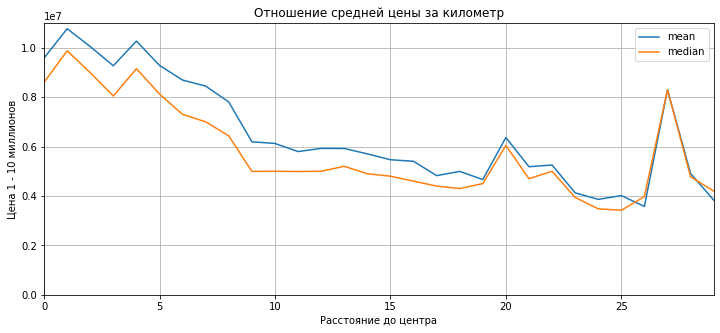

In [938]:
center_mean = sp_data.pivot_table(index='center_distance', values='last_price', aggfunc=('mean', 'median'))
center_mean.plot(grid=True, figsize=(12, 5))
plt.ylim(0, 11000000)
plt.ylabel('Цена 1 - 10 миллионов')
plt.xlabel('Расстояние до центра')
plt.title('Отношение средней цены за километр')
plt.show()

### 5.6 Вывод
Изучив график распределения средней цены за каждый километр от центра, принял решение что отметка 9км - самая крайняя, после неё график начинает меняться с плавного на скачкообразный.

<a id = "5.7"></a><br>
### 5.7 Выделение сегмента квартир в центре
[Назад](#7)

#### В выводе выше мы обозначили границу в 9 километров. Сделаем срез данных по этому значению. Дополнительно сделаем срез свыше 9 км

In [960]:
center_flats = sp_data.query('center_distance < 9')
no_center_flats = sp_data.query('center_distance > 9')

#### Выведем подробную статистику по выборке по срезом и без:

In [940]:
center_flats[['total_area', 'rooms', 'ceiling_height', 'last_price', 'cityCenters_nearest']].describe()

,total_area,rooms,ceiling_height,last_price,cityCenters_nearest
count,3874.000000,3874.000000,3874.000000,3.874000e+03,3874.000000
mean,74.840475,2.489675,2.438565,9.235577e+06,5269.652814
std,32.126273,1.114893,1.830958,4.613460e+06,2201.722455
min,12.000000,0.000000,2.000000,1.600000e+06,0.000000
25%,50.000000,2.000000,2.000000,5.910000e+06,3860.000000
50%,70.000000,2.000000,2.000000,8.100000e+06,5103.000000
75%,93.000000,3.000000,3.000000,1.150000e+07,7096.000000
max,197.000000,6.000000,100.000000,2.500000e+07,8990.000000


In [941]:
sp_data[['total_area', 'rooms', 'ceiling_height', 'last_price', 'cityCenters_nearest']].describe()

,total_area,rooms,ceiling_height,last_price,cityCenters_nearest
count,14994.000000,14994.000000,14994.000000,1.499400e+04,14994.000000
mean,59.558423,2.083300,2.159931,6.604665e+06,11793.410964
std,26.222846,0.999932,1.106678,3.717716e+06,4784.239979
min,12.000000,0.000000,1.000000,1.219000e+04,0.000000
25%,41.000000,1.000000,2.000000,4.171250e+06,8774.000000
50%,53.500000,2.000000,2.000000,5.400000e+06,12398.000000
75%,71.000000,3.000000,2.000000,7.700000e+06,15016.000000
max,199.000000,6.000000,100.000000,2.500000e+07,29493.000000


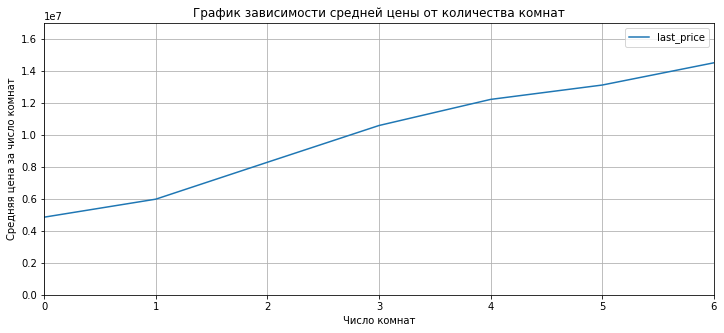

In [943]:
compare = center_flats.pivot_table(index='rooms', values='last_price', aggfunc=('mean'))
compare.plot(grid=True, figsize=(12, 5))
plt.ylim(0, 17000000)
plt.ylabel('Средняя цена за число комнат')
plt.xlabel('Число комнат')
plt.title('График зависимости средней цены от количества комнат')
plt.show()

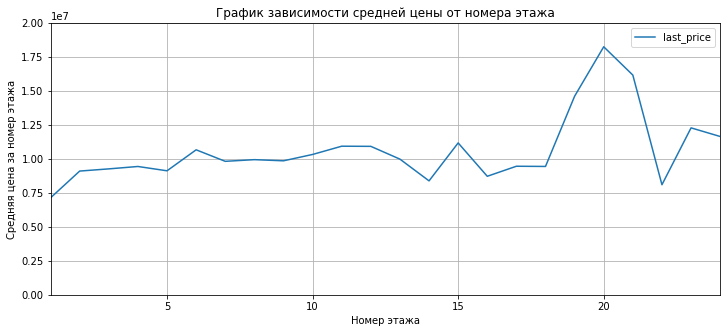

In [945]:
compare = center_flats.pivot_table(index='floor', values='last_price', aggfunc=('mean'))
compare.plot(grid=True, figsize=(12, 5))
plt.ylim(0, 20000000)
plt.ylabel('Средняя цена за номер этажа')
plt.xlabel('Номер этажа')
plt.title('График зависимости средней цены от номера этажа')
plt.show()

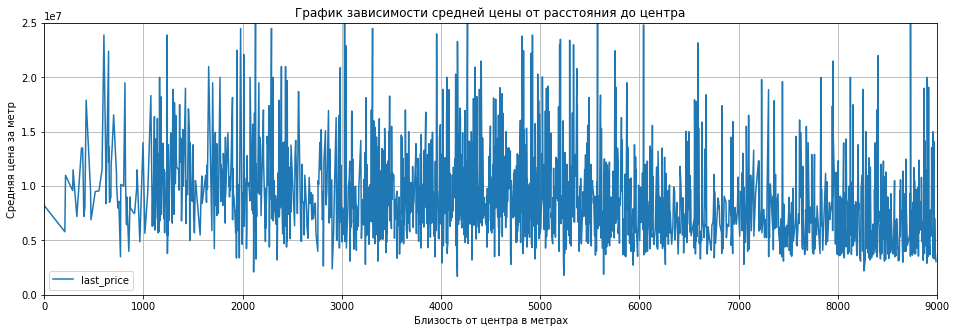

In [950]:
compare = center_flats.pivot_table(index='cityCenters_nearest', values='last_price')
compare.plot(grid=True, figsize=(16, 5))
plt.ylim(0, 25000000)
plt.xlim(0, 9000)
plt.ylabel('Средняя цена за метр')
plt.xlabel('Близость от центра в метрах')
plt.title('График зависимости средней цены от расстояния до центра')
plt.show()

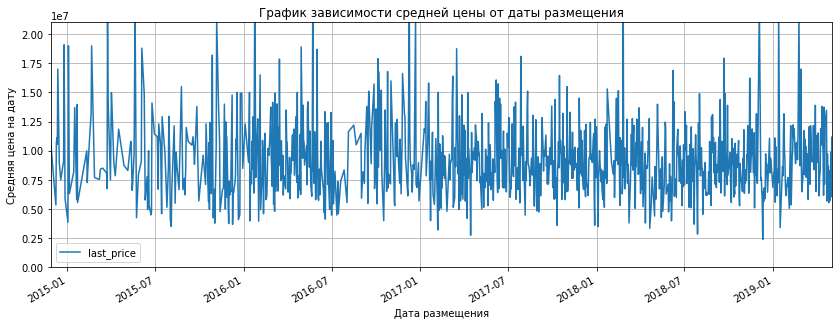

In [952]:
compare = center_flats.pivot_table(index='first_day_exposition', values='last_price', aggfunc=('mean'))
compare.plot(grid=True, figsize=(14, 5))
plt.ylim(0, 21000000)
plt.ylabel('Средняя цена на дату')
plt.xlabel('Дата размещения')
plt.title('График зависимости средней цены от даты размещения')
plt.show()

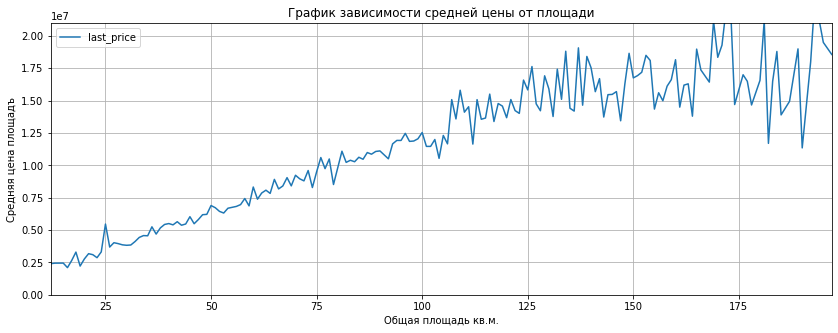

In [955]:
compare = center_flats.pivot_table(index='total_area', values='last_price', aggfunc=('mean'))
compare.plot(grid=True, figsize=(14, 5))
plt.ylim(0, 21000000)
plt.ylabel('Средняя цена площадъ')
plt.xlabel('Общая площадь кв.м.')
plt.title('График зависимости средней цены от площади')
plt.show()

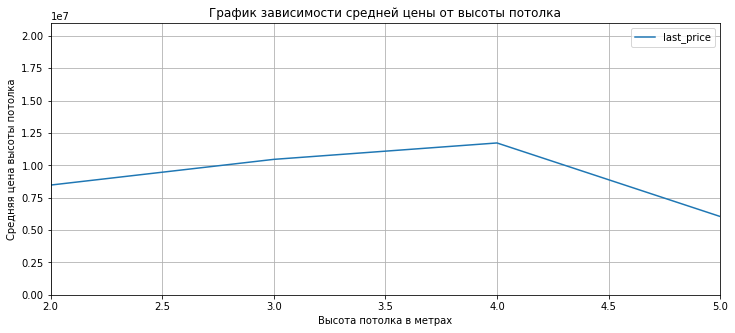

In [957]:
compare = center_flats.pivot_table(index='ceiling_height', values='last_price', aggfunc=('mean'))
compare.plot(grid=True, figsize=(12, 5))
plt.ylim(0, 21000000)
plt.xlim(2, 5)
plt.ylabel('Средняя цена высоты потолка')
plt.xlabel('Высота потолка в метрах')
plt.title('График зависимости средней цены от высоты потолка')
plt.show()

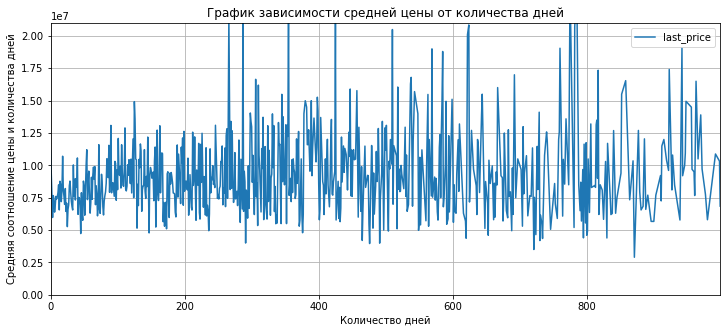

In [959]:
compare = center_flats.pivot_table(index='days_exposition', values='last_price', aggfunc=('mean'))
compare.plot(grid=True, figsize=(12, 5))
plt.ylim(0, 21000000)
plt.ylabel('Средняя соотношение цены и количества дней')
plt.xlabel('Количество дней')
plt.title('График зависимости средней цены от количества дней')
plt.show()

#### Сравним матрицу корреляции двух срезов и сравним

#### Корреляция в пределах 9км

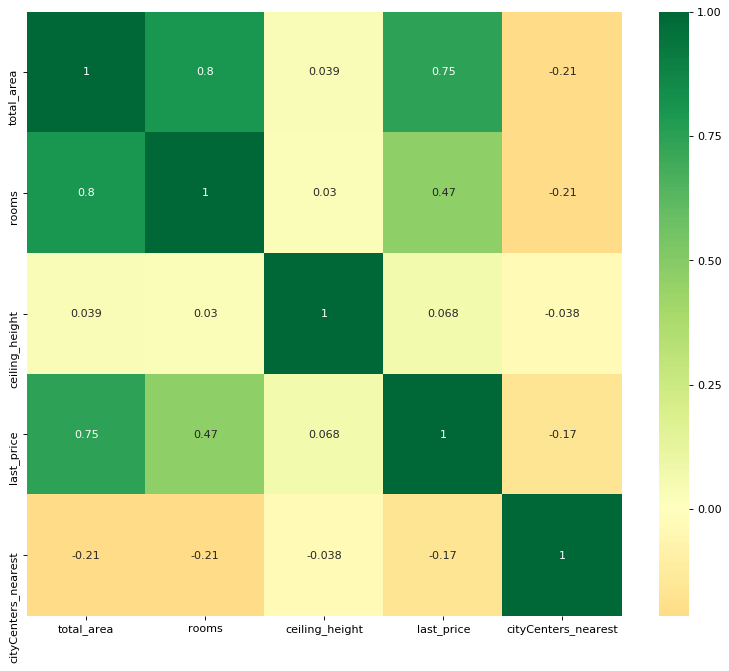

In [963]:
center_list = center_flats[['total_area', 'rooms', 'ceiling_height', 'last_price', 'cityCenters_nearest']]
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(center_list.corr(), xticklabels=center_list.corr().columns, yticklabels=center_list.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

#### Корреляция за пределами 9км

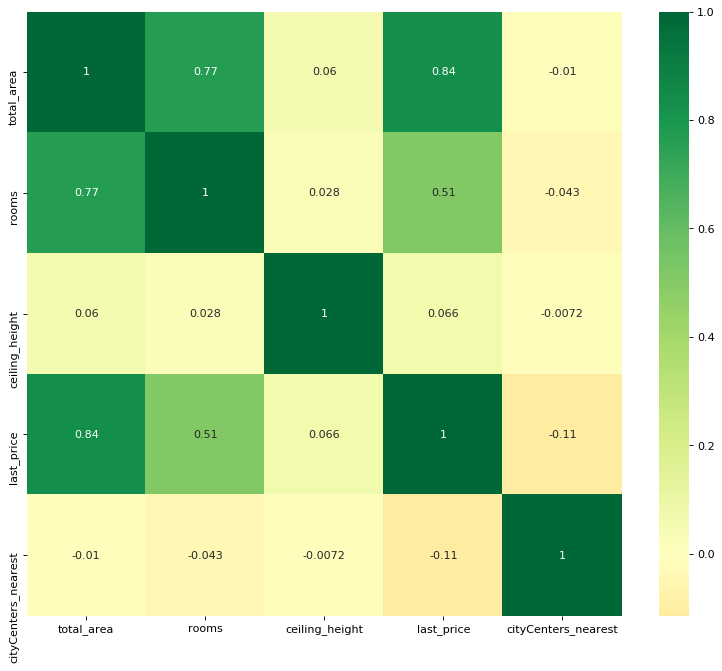

In [962]:
no_center_list = no_center_flats[['total_area', 'rooms', 'ceiling_height', 'last_price', 'cityCenters_nearest']]
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(no_center_list.corr(), xticklabels=no_center_list.corr().columns, yticklabels=no_center_list.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

### 5.7 Вывод
* Описательная статистика по двум срезам оказалась практически без изменений
* Из всех значений хорошо коррелирует с ценой количество комнат
* Этажи влияют на цену в пределах 7.5-10 миллионов
* Отношение расстояния от центра и цены сильно зашумлено(разброс от 6 до 11 миллионов), что в итоге даёт отрицательную корреляцию. Скорее всего мы наблюдаем беспорядочный ценник на недвижимость, но эта тенденция визуально падает, с удалением от центра города.
* Зависимость года публикации и цены с сильным отклонением, но стабильное среднее между 7.5-8.5 миллионами
* Если брать полную выборку по Санкт-Петербургу и этому срезу, то различия минимальны. Был только выставлен порог расстояния от центра, тем самым исключив большую часть данных сверху.

<b>За пределами 9км увеличилась корреляция цены и числа комнат, а также корреляция цены и площади </b>

*Связано это с тем, что в центре у нас около ~3800 позиций, а за пределами ~10000*

<a id = "6"></a><br>
### Шаг 6. Общий вывод
[Назад](#7)

1) Была исследована выборка недвижимости по Санкт-Петербургу и области, в период с 2015 по 2019 год
 * Были найдены значительные выбросы в данных, пропуски в гео данных, большой разброс по названиям локаций
 * С помощью предварительно обработки удалось устранить пропуски, соответствие типов данных, для дальнейшего исследования и анализа. Большой процент данных пришлось заменить на нулевые значения, что внесло некоторые искажения на графиках
 
2) Сначала исследование началось с общей оценки недвижимости, без разделения на область и центр
 * В среднем 200-250 дней уходит на продажу квартиры, корреляция с ценой довольно слабая
 
3) В топ-10 населённых пунктов была выявлена следующая тенденция:
 * В пределах 19-22км цена на недвижимость колеблется от 4-5 миллионов рублей. Такие цены можно встретить и в центре города, что собственно и отражает отрицательную корреляцию. 
4) Была выделена тенденция роста стоимости и площади, как в общей выборке, так и в пределах центра города
 * Количество комнат и цена также дополняют положительную корреляцию
 * Стоимость и расстояние от центра имеют очень большой разброс и слабую корреляцию, но тенденция снижения цены наблюдается
 * Этажность, высота потолков имеет слабую корреляцию, но разброс цены виден по графикам. Рост высоты потолка наблюдается из-за достаточного количества недвижимости, времён СССР, где потолки доходили до приличного размера. В центре города их много, но больше влияет всё же расстояние